In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data=pd.read_csv("indian_liver_patient.csv")

In [5]:
data.shape

(583, 11)

In [6]:
data['Result']=data['Dataset'].replace(2,0)
data.drop('Dataset',axis=1,inplace=True)
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Result
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [7]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Result'],
      dtype='object')

In [8]:
data.shape

(583, 11)

In [9]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Result                        0
dtype: int64

In [10]:
data.dropna(inplace=True)
data=data[-data.duplicated(subset=None,keep='first')]

In [11]:
data.shape

(566, 11)

In [12]:
data.drop(data[data['Total_Bilirubin']>50].index,inplace=True)
data.drop(data[data['Direct_Bilirubin']>15].index,inplace=True)
data.drop(data[data['Alamine_Aminotransferase']>1500].index,inplace=True)
data.drop(data[data['Aspartate_Aminotransferase']>2000].index,inplace=True)
data.shape

(558, 11)

In [13]:
data['s_m']=pd.get_dummies(data['Gender'],prefix='S',drop_first=True)
data.drop('Gender',axis=1,inplace=True)

In [14]:
correlation_matrix=data.corr().round(2)
correlation_matrix['Result'].sort_values(ascending=False)

Result                        1.00
Direct_Bilirubin              0.25
Total_Bilirubin               0.24
Aspartate_Aminotransferase    0.20
Alkaline_Phosphotase          0.19
Alamine_Aminotransferase      0.18
Age                           0.14
s_m                           0.07
Total_Protiens               -0.04
Albumin                      -0.16
Albumin_and_Globulin_Ratio   -0.17
Name: Result, dtype: float64

In [15]:
X_res=data.drop(['Result'],axis=1)

y_res=data['Result']

In [16]:
x_train_noncorr=data.drop('Total_Protiens',axis=1)

In [17]:
data.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Result',
       's_m'],
      dtype='object')

In [18]:
no_disease=data[data['Result']==0]
disease=data[data['Result']==1]

In [19]:
print(no_disease.shape,disease.shape)

(162, 11) (396, 11)


In [20]:
cols=['Total_Protiens']
data=data.drop(cols,axis=1)

In [21]:
data.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Result', 's_m'],
      dtype='object')

In [22]:
from imblearn.over_sampling import RandomOverSampler

In [23]:
os=RandomOverSampler(random_state=10)

In [24]:
X,y=os.fit_resample(X_res,y_res)

In [25]:
X.shape,y.shape

((792, 10), (792,))

In [26]:
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
print('x_train is',X_train.shape)
print('x_test is',X_test.shape)
print('y_train is',y_train.shape)
print('y_test is',y_test.shape)

x_train is (633, 10)
x_test is (159, 10)
y_train is (633,)
y_test is (159,)


In [27]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



In [28]:
r={}
from sklearn.metrics import confusion_matrix


		------------RFC------------		
Axes(0.125,0.125;0.62x0.755)
Axes(0.125,0.125;0.62x0.755)
Axes(0.125,0.125;0.62x0.755)
Axes(0.125,0.125;0.62x0.755)
Axes(0.125,0.125;0.62x0.755)
Axes(0.125,0.125;0.62x0.755)
Axes(0.125,0.125;0.62x0.755)
Axes(0.125,0.125;0.62x0.755)
Axes(0.125,0.125;0.62x0.755)
Axes(0.125,0.125;0.62x0.755)
accuracy for Random Forest : 87.00
-----------------------------------------------


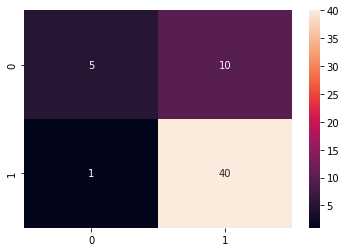

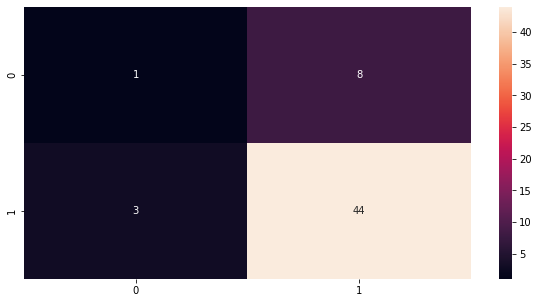

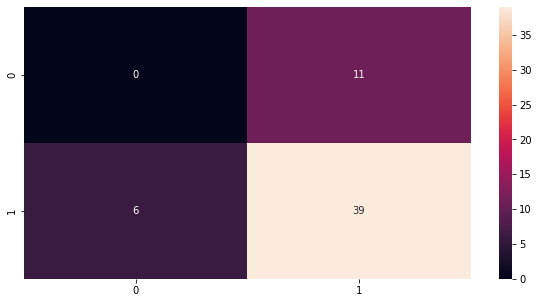

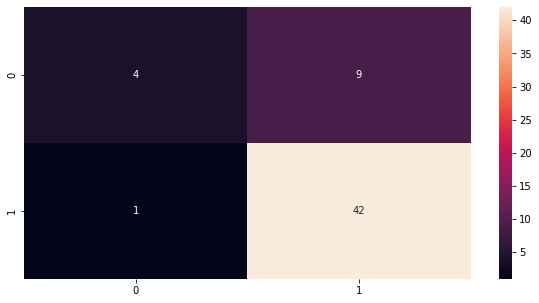

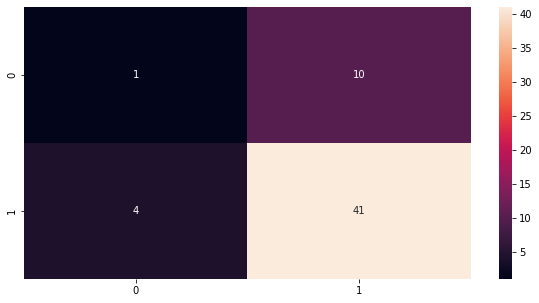

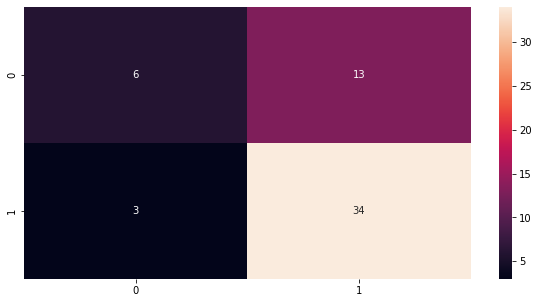

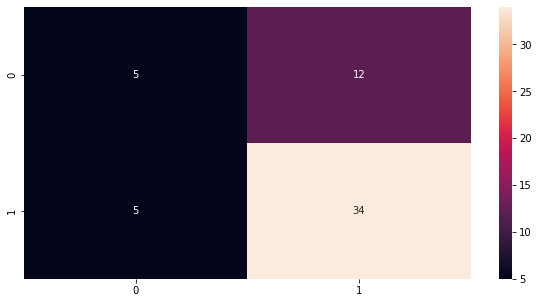

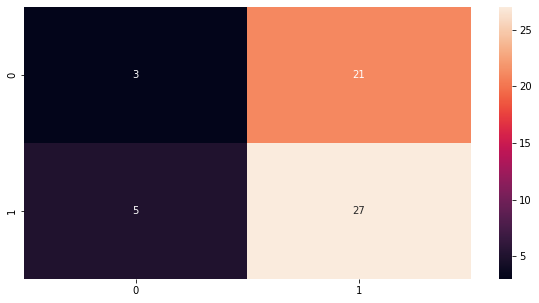

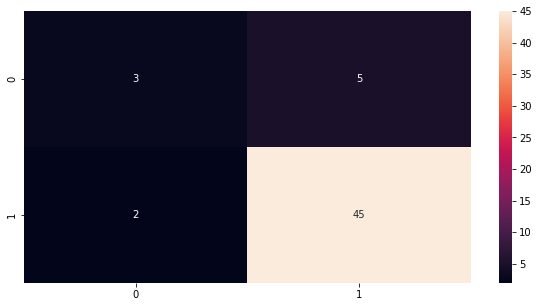

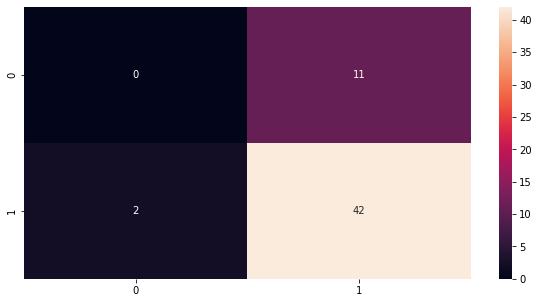

<Figure size 720x360 with 0 Axes>

In [29]:
def RFC(data):
    print('\t\t------------RFC------------\t\t')    
    X = data.iloc[:,:-1].values
    y = data.iloc[:, -1].values
    cv = KFold(n_splits=10)
    rfc = RandomForestClassifier(n_estimators=85,random_state=1)
    rfc_score = []
    for train_index, test_index in cv.split(X):
        X_train, y_train = X[train_index], y[train_index]
        X_test, y_test   = X[test_index], y[test_index]
        rfc.fit(X_train,y_train)
        predict_RFC=rfc.predict(X_test)
        accuracy_RFC=accuracy_score(y_test,predict_RFC)
        cm = confusion_matrix(y_test,predict_RFC)
        print( sns.heatmap(cm,annot=True))
        rfc_score.append(accuracy_RFC)
        plt.figure(figsize=(10,5))

    round_rfc_score = [round(rfc_num,2) for rfc_num in rfc_score]
    print("accuracy for Random Forest : "+"{:.2f}".format(np.max(round_rfc_score) * 100))
    print('-----------------------------------------------')
    ci = np.max(round_rfc_score)
    c = round(ci,2)
    return c
r['RFC']=RFC(data)

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix



In [35]:
def DTC(data):
    print('\t\t------------DTC------------\t\t')
    X = data.iloc[:,:-1].values
    y = data.iloc[:, -1].values
    cv = KFold(n_splits=25)
    dtc = DecisionTreeClassifier(random_state=1)
    dtc_score = []
    for train_index, test_index in cv.split(X):
        X_train, y_train = X[train_index], y[train_index]
        X_test, y_test   = X[test_index], y[test_index]
        dtc.fit(X_train,y_train)
        predict_DTC=dtc.predict(X_test)
        cm = confusion_matrix(y_test,predict_DTC)
        print('confusion matrix')
        print(cm)
        accuracy_DTC=accuracy_score(y_test,predict_DTC)
        dtc_score.append(accuracy_DTC)
    #round the accuracies in the list
    round_dtc_score = [round(dtc_num,2) for dtc_num in dtc_score]
    #print('Accuracies of Decision Tree :',round_dtc_score)
    #print('-----------------------------------------------')
    print("accuracy Score for Decision Tree : "+"{:.2f}".format(np.max(round_dtc_score) * 100))
    print('-----------------------------------------------')
    di = np.max(dtc_score)
    d = round(di,2)
    return d
r['DTC']=DTC(data)
dtc = DecisionTreeClassifier(random_state=1)
dtc.fit(X_train,y_train)


predict_DTC=dtc.predict(X_test)



		------------DTC------------		
confusion matrix
[[ 3  2]
 [ 5 13]]
confusion matrix
[[ 3  4]
 [ 1 15]]
confusion matrix
[[ 3  4]
 [ 6 10]]
confusion matrix
[[ 0  3]
 [ 4 16]]
confusion matrix
[[ 1  2]
 [ 6 14]]
confusion matrix
[[ 0  7]
 [ 5 11]]
confusion matrix
[[ 1  2]
 [ 9 11]]
confusion matrix
[[ 3  0]
 [ 3 17]]
confusion matrix
[[ 2  1]
 [ 3 16]]
confusion matrix
[[ 1  6]
 [ 2 13]]
confusion matrix
[[ 0  3]
 [ 2 17]]
confusion matrix
[[ 1  3]
 [ 3 15]]
confusion matrix
[[5 7]
 [5 5]]
confusion matrix
[[ 3  3]
 [ 1 15]]
confusion matrix
[[ 1  5]
 [ 1 15]]
confusion matrix
[[ 6  3]
 [ 3 10]]
confusion matrix
[[ 0  5]
 [ 6 11]]
confusion matrix
[[ 0  5]
 [ 6 11]]
confusion matrix
[[3 9]
 [1 9]]
confusion matrix
[[5 4]
 [7 6]]
confusion matrix
[[ 3  1]
 [ 6 12]]
confusion matrix
[[ 0  2]
 [ 4 16]]
confusion matrix
[[ 2  3]
 [ 2 15]]
confusion matrix
[[ 0  5]
 [ 2 15]]
confusion matrix
[[ 1  2]
 [ 5 14]]
accuracy Score for Decision Tree : 87.00
---------------------------------------

In [36]:
def KNN(data):
    print('\t\t\t----------KNN------------\t\t\t')
    X = data.iloc[:,:-1].values
    y = data.iloc[:, -1].values
    cv = KFold(n_splits=10)
    knn = KNeighborsClassifier()
    knn_score = []
    for train_index, test_index in cv.split(X):
        X_train, y_train = X[train_index], y[train_index]
        X_test, y_test   = X[test_index], y[test_index]
        knn.fit(X_train,y_train)
        predict_KNN=knn.predict(X_test)
        #print(classification_report(y_test,predict_KNN))
        cm = confusion_matrix(y_test,predict_KNN)
        print('confusion matrix')
        print(cm)
        accuracy_KNN=accuracy_score(y_test,predict_KNN)
        #print('KNN Accuracy :', round(accuracy_KNN,2))
        knn_score.append(accuracy_KNN)
    #round the accuracies in the list
    round_knn_score = [round(knn_num,2) for knn_num in knn_score]
    print('Accuracies of KNN :',round_knn_score)
    print('-----------------------------------------------')
    print("Mean Score for KNN : "+"{:.2f}".format(np.max(round_knn_score) * 100))
    print('----------------------------------')
    ai = np.max(knn_score)
    a = round(ai,2)
    return a
r['KNN']=KNN(data)

			----------KNN------------			
confusion matrix
[[ 1 14]
 [ 2 39]]
confusion matrix
[[ 3  6]
 [ 5 42]]
confusion matrix
[[ 1 10]
 [ 7 38]]
confusion matrix
[[ 3 10]
 [ 6 37]]
confusion matrix
[[ 3  8]
 [ 4 41]]
confusion matrix
[[ 2 17]
 [ 6 31]]
confusion matrix
[[ 3 14]
 [ 5 34]]
confusion matrix
[[ 4 20]
 [ 4 28]]
confusion matrix
[[ 1  7]
 [ 5 42]]
confusion matrix
[[ 1 10]
 [ 4 40]]
Accuracies of KNN : [0.71, 0.8, 0.7, 0.71, 0.79, 0.59, 0.66, 0.57, 0.78, 0.75]
-----------------------------------------------
Mean Score for KNN : 80.00
----------------------------------


AxesSubplot(0.125,0.125;0.62x0.755)


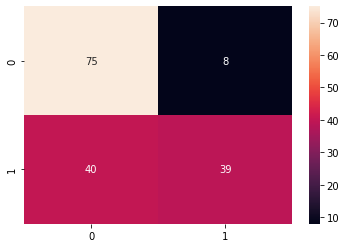

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
predict_KNN=knn.predict(X_test)
cm = confusion_matrix(y_test,predict_KNN)
print(sns.heatmap(cm,annot=True))




In [37]:
from sklearn.linear_model import LogisticRegression


In [38]:
def LR(data): 
    print('\t\t------------LR------------\t\t')
    X = data.iloc[:,:-1].values
    y = data.iloc[:, -1].values
    cv = KFold(n_splits=10)
    lr = LogisticRegression(random_state=1)
    lr_score = []
    for train_index, test_index in cv.split(X):
        X_train, y_train = X[train_index], y[train_index]
        X_test, y_test   = X[test_index], y[test_index]
        lr.fit(X_train,y_train)
        predict_LR=lr.predict(X_test)
        accuracy_LR=accuracy_score(y_test,predict_LR)
        cm = confusion_matrix(y_test,predict_LR)
        print('confusion matrix')
        print(cm)
  
        lr_score.append(accuracy_LR)
    #round the accuracies in the list
    round_lr_score = [round(lr_num,2) for lr_num in lr_score]
    print('Accuracies of LR :',round_lr_score)
    print('-----------------------------------------------')
    print("Max Score for Logistic Regression : "+"{:.2f}".format(np.max(round_lr_score) * 100))
    print('-----------------------------------------------')
    bi = np.max(lr_score)
    b = round(bi,2)
    return b
r['LR']=LR(data)

		------------LR------------		
confusion matrix
[[ 0 15]
 [ 0 41]]
confusion matrix
[[ 0  9]
 [ 0 47]]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

confusion matrix
[[ 0 11]
 [ 0 45]]
confusion matrix
[[ 0 13]
 [ 0 43]]
confusion matrix
[[ 0 11]
 [ 1 44]]
confusion matrix
[[ 0 19]
 [ 0 37]]
confusion matrix
[[ 0 17]
 [ 0 39]]
confusion matrix
[[ 0 24]
 [ 0 32]]
confusion matrix
[[ 0  8]
 [ 0 47]]
confusion matrix
[[ 0 11]
 [ 0 44]]
Accuracies of LR : [0.73, 0.84, 0.8, 0.77, 0.79, 0.66, 0.7, 0.57, 0.85, 0.8]
-----------------------------------------------
Max Score for Logistic Regression : 85.00
-----------------------------------------------


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


confusion matrix
Axes(0.125,0.125;0.62x0.755)


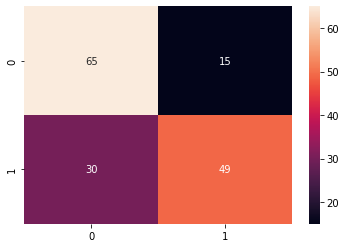

In [39]:
lr = LogisticRegression(random_state=1)

lr.fit(X_train,y_train)
predict_LR=lr.predict(X_test)
accuracy_LR=accuracy_score(y_test,predict_LR)
cm = confusion_matrix(y_test,predict_LR)
print('confusion matrix')
print(sns.heatmap(cm,annot=True))

In [40]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
def ETC(data):
    print('\t\t------------ETC------------\t\t')
    X = data.iloc[:,:-1].values
    y = data.iloc[:, -1].values
    cv = KFold(n_splits=20)
    etc = ExtraTreesClassifier()
    etc_score = []
    for train_index, test_index in cv.split(X):
        X_train, y_train = X[train_index], y[train_index]
        X_test, y_test   = X[test_index], y[test_index]
        etc.fit(X_train,y_train)
        predict_ETC=etc.predict(X_test)
        accuracy_ETC=accuracy_score(y_test,predict_ETC)
        cm = confusion_matrix(y_test,predict_ETC,labels=(1,0))
        plt.figure(figsize=(10,5))

        print(sns.heatmap(cm,annot=True))

        etc_score.append(accuracy_ETC)
    #round the accuracies in the list
    round_etc_score = [round(etc_num,2) for etc_num in etc_score]
    #print('Accuracies of ExtraTree :',round_etc_score)
    #print('-----------------------------------------------')
    print("accuacy Score for EXTRA Tree : "+"{:.2f}".format(np.max(round_etc_score) * 100))

    print('-----------------------------------------------')
    ei = np.max(etc_score)
    e = round(ei,2)
    return e
  

r['ETC']=ETC(data)


		------------ETC------------		
Axes(0.125,0.125;0.62x0.755)
Axes(0.125,0.125;0.62x0.755)
Axes(0.125,0.125;0.62x0.755)
Axes(0.125,0.125;0.62x0.755)
Axes(0.125,0.125;0.62x0.755)
Axes(0.125,0.125;0.62x0.755)
Axes(0.125,0.125;0.62x0.755)
Axes(0.125,0.125;0.62x0.755)
Axes(0.125,0.125;0.62x0.755)
Axes(0.125,0.125;0.62x0.755)
Axes(0.125,0.125;0.62x0.755)
Axes(0.125,0.125;0.62x0.755)
Axes(0.125,0.125;0.62x0.755)
Axes(0.125,0.125;0.62x0.755)
Axes(0.125,0.125;0.62x0.755)
Axes(0.125,0.125;0.62x0.755)
Axes(0.125,0.125;0.62x0.755)
Axes(0.125,0.125;0.62x0.755)
Axes(0.125,0.125;0.62x0.755)
Axes(0.125,0.125;0.62x0.755)
accuacy Score for EXTRA Tree : 93.00
-----------------------------------------------


AxesSubplot(0.125,0.125;0.62x0.755)
0.8301886792452831


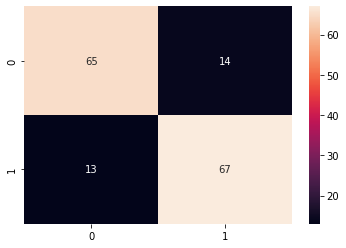

In [ ]:
etc = ExtraTreesClassifier()

cv = KFold(n_splits=116)

etc.fit(X_train,y_train)
predict_ETC=etc.predict(X_test)
accuracy_ETC=accuracy_score(y_test,predict_ETC)
cm = confusion_matrix(y_test,predict_ETC,labels=(1,0))
print(sns.heatmap(cm,annot=True))
print(accuracy_score(y_test,predict_ETC))



In [ ]:

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
cv = KFold(n_splits=20)

print(accuracy_score(y_test,predict_ETC))
print(precision_score(y_test,predict_ETC))
print(recall_score(y_test,predict_ETC))
print(f1_score(y_test,predict_ETC))

0.8238993710691824
0.8148148148148148
0.8354430379746836
0.825
